<a href="https://colab.research.google.com/github/xup5/Computational-Neuroscience-Class/blob/main/Lab%201%20Poisson/Spike_trains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a tutorial for generating Poisson spike trains.
Original tutorial: David Heeger (for Cold Spring Harbor Lab summer school).
Modified by: Odelia Schwartz and Xu Pan.

# Generating Samples of a Poisson Process.

Spike trains in neurons are often modeled as a Poisson random 
process.

One of the easiest ways to generate a Poisson spike
train is to rely on the approximation that in any small
time interval the probability of a spike is proportional
to the mean spike count (firing rate) times the time step:

   Prob{spike during (t,t+deltaT)} = r(t) * deltaT

where r(t) is the firing rate and deltaT is 
the time step.  This approximation is only valid when deltaT is
very short so that there is essentially no chance of there
being more than one spike per time interval.

## Part 1


In [1]:
# Let's begin by choosing a time step and by choosing an average
# firing rate.
# After running this, try and also choose different firing rates.

deltaT = 1e-3 			# Time step: 1e-3 secs = 1 msec
rate = 10			    	# Firing rate: spikes/sec
duration = 1			  # 1 sec simulation

In [5]:
# Choose the time intervals

import numpy as np

times = np.arange(0, duration, deltaT)
times.shape

(1000,)

In [18]:
# We can generate one random number between 0 and 1 (uniform distribution)
# Try this many times

xr_one = np.random.rand()
print(xr_one)

0.42514459537113736


In [19]:
# Let's check if the mean firing rate times the time interval 
# is greater than the random number
# Again, we can repeat choosing a random number and checking
# many times

intervalRate = rate * deltaT
print(intervalRate)
print(xr_one)
intervalRate > xr_one 

0.01
0.42514459537113736


False

In [27]:
# We want to do this process not just for one interval,
# but for all the time intervals over the duration
# We'll choose a bunch of random numbers, one for each time step,
# uniformly distributed between 0 and 1.

xr = np.random.rand(*times.shape)

Text(0, 0.5, 'Probability')

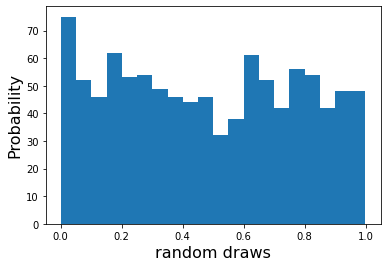

In [33]:
# Check that values are reasonably random by plotting a histogram

import matplotlib.pyplot as plt

plt.hist(xr, bins=20);
plt.xlabel('random draws', fontsize=16)
plt.ylabel('Probability', fontsize=16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


Text(0, 0.5, 'Neural Response (Spikes)')

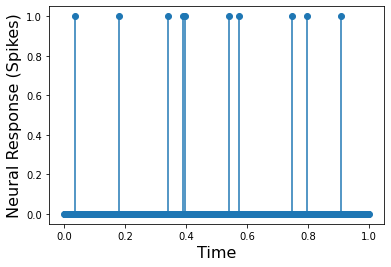

In [36]:
# Now, insert a spike whenever the probability of firing
# (rate*deltaT) is greater than the corresponding random number:
# Python (numpy) allows you to do this operation in one line, without a 
# for loop. 

neuralResponse = intervalRate > xr

# We'll plot the neural responses (spikes) using the plt.stem()
# which is a lollipop plot...
plt.stem(times, neuralResponse, basefmt=" ");    
plt.xlabel('Time', fontsize=16)
plt.ylabel('Neural Response (Spikes)', fontsize=16)

In [38]:
# To get a better understanding of what this does, we
# can look at the values for a vector of length 5
# Try changing the vector to get more spikes

tmpxr = np.array([.001, .1, .2, .5, .06])
print(intervalRate)
tmpResponse = intervalRate > tmpxr
print(tmpResponse)

0.01
[ True False False False False]


In [40]:
# Calculate the spike count, which are the number of spikes during the time duration

spikeCount = np.sum(neuralResponse)
print(spikeCount)

10


## Part 2

In [44]:
#@title Default title text
# TODO: Repeat 5000 times: generating random numbers xr, computing neuralResponse and calculating
# spikeCount. Save the resulting number of spikes into spikeCounts each of the 5000 times.

len = 5000
spikeCounts = np.zeros(len)
print(spikeCounts.shape)

for repeat in range(5000):
  # Your code here:
  xr = np.random.rand(*times.shape)
  neuralResponse = intervalRate > xr
  spikeCounts[repeat] = np.sum(neuralResponse)

(5000,)


In [45]:
# What is the mean of the spikeCounts? How does it
# compare to the firing rate?

print(np.mean(spikeCounts))
print(rate)

9.9634
10


Text(0, 0.5, 'Probability')

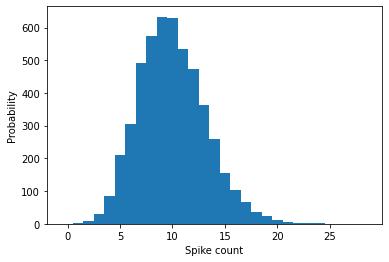

In [68]:
# Plot a spike count histogram

x=np.arange(0, 30);
plt.hist(spikeCounts, bins=x, align='left')
plt.xlabel('Spike count')
plt.ylabel('Probability')

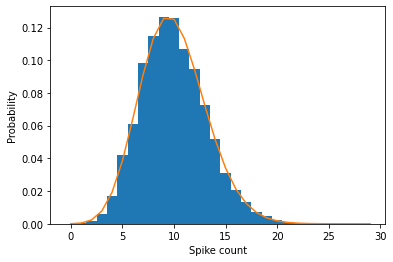

In [66]:
#@title Default title text
# Plot a normalized histogram (that sums to 1)
# for comparison with the Poisson

from scipy.stats import poisson

plt.hist(spikeCounts, bins=x, density=True, align='left')
plt.xlabel('Spike count')
plt.ylabel('Probability')
y = poisson.pmf(x, mu=np.mean(spikeCounts))
plt.plot(x,y)

In [67]:
#   Here are some things for you to do in class for the code above:

# - Try repeating the above code by choosing a lower firing rate 
#   (3) or a higher rate (15) by changing the variable rate at the top.
#   Plot the resulting distributions. How does the mean change?
#   Also plot examples of the spike trains in the repeated runs.

# - Try changing the number of repeats from 1000, to 50, 10, and 10000. 
#   Plot the resulting distributions. How good is the fit to Poisson?